In [28]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv("dataset_clean.csv")
df

,id_producto,nombre_marca,nombre_reciclaje,nombre_empresa,nombre_productos_clasificacion,nombre,gramos_envase,formato,unidad,unidad_real,cantidad,texto,cluster300,label300,label
0,44.0,celebrite,VIDRIO,CELEBRITE,"LICORES, CERVEZAS Y VINOS",Espumante Celebrite Extra Brut cc,800.0,NaN,NaN,NaN,NaN,espumante celebrite extra brut,114,Brut Espumante,Brut Espumante
1,55.0,viñamar,VIDRIO,CCU,"LICORES, CERVEZAS Y VINOS",Viña Mar Extra Brut,800.0,NaN,NaN,NaN,NaN,viña mar extra brut,43,NaN,Brut Viña
2,137.0,viñamar,VIDRIO,CCU,"LICORES, CERVEZAS Y VINOS",VINO ESPUMANTE EXTRA BRUT,800.0,750CC,CC,CC,750.0,vino espumante extra brut,114,Brut Espumante,Brut Espumante
3,4839.0,alto del carmen,VIDRIO,NaN,"LICORES, CERVEZAS Y VINOS",Pisco Alto del Carmen LT Alto Especial,800.0,NaN,NaN,NaN,NaN,pisco alto carmen alto especial,130,Pisco,Pisco
4,14.0,mistral,VIDRIO,CCU,"LICORES, CERVEZAS Y VINOS",PISCO ESPECIAL AÑEJADO EN ROBLE BOTELLA,800.0,750CC,CC,CC,750.0,pisco especial añejado roble botella,130,Pisco,Pisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,872.0,prochef,NaN,PROCHEF,NaN,ACEITE AEROSOL COCO PROCHEF GR,1.0,225GR,GR,GR,225.0,aceite aerosol coco prochef,12,Aceite,Aceite
4994,873.0,prochef,NaN,PROCHEF,NaN,ACEITE AEROSOL CANOL PROCHEF GR,1.0,400GR,GR,GR,400.0,aceite aerosol canol prochef,12,Aceite,Aceite
4995,874.0,prochef,NaN,PROCHEF,NaN,SPRAY OLIVA LIGHT. PROCHEF GR,1.0,225GR,GR,GR,225.0,spray oliva light prochef,43,NaN,Spray
4996,738.0,olivodeplata,NaN,OLIVODEPLATA,NaN,ACEITE OLIVA EXTRA VIRGEN OLIVODEPLATA LT,1.0,1LT,LT,LT,1.0,aceite oliva extra virgen olivodeplata,12,Aceite,Aceite


In [30]:
df['categoria'] = df['nombre_reciclaje']
df['categoria'].replace('HOJALATA', 'LATAS Y METALES', inplace=True)
df['categoria'].replace('ALUMINIO', 'LATAS Y METALES', inplace=True)
df['categoria'].replace('VIDRIO', 'VIDRIOS', inplace=True)
df['categoria'].replace('PET 1', 'PLÁSTICO', inplace=True)
df['categoria'].replace('HDPE 2', 'PLÁSTICO', inplace=True)
df['categoria'].replace('PVC 3', 'PLÁSTICO', inplace=True)
df['categoria'].replace('LDPE 4', 'PLÁSTICO', inplace=True)
df['categoria'].replace('PP 5', 'PLÁSTICO', inplace=True)
df['categoria'].replace('PS 6', 'PLÁSTICO', inplace=True)
df['categoria'].replace('OTROS 7', 'PLÁSTICO', inplace=True)
df['categoria'].replace('PAPEL', 'PAPEL Y CARTONES', inplace=True)
df['categoria'].replace('CARTÓN', 'PAPEL Y CARTONES', inplace=True)
df['categoria'].replace('POLIETILENO Y ALUMINIO', 'TETRAPACK', inplace=True)

#= random_state_selection(X, y, random_list, size)
units = ['KG', 'LT', 'ML', 'GR', 'UN', 'CC']
unidad_real = df['unidad_real'].tolist()
units_clean = []
for element in unidad_real:
    if element in units:
        units_clean.append(element)
    else:
        units_clean.append(np.nan)
df['unidad_real'] = units_clean

In [31]:
for col in df.columns:
    largo = len(df[col].unique())
    print(col, ': ', largo)

id_producto :  4998
nombre_marca :  731
nombre_reciclaje :  14
nombre_empresa :  174
nombre_productos_clasificacion :  14
nombre :  4286
gramos_envase :  91
formato :  771
unidad :  235
unidad_real :  7
cantidad :  276
texto :  4036
cluster300 :  300
label300 :  289
label :  883
categoria :  6


In [45]:
df.describe()

,id_producto,gramos_envase,cantidad,cluster300
count,4997.000000,4998.000000,3595.000000,4998.000000
mean,2499.974585,49.820528,634.381892,89.710684
std,1442.696892,153.592462,6550.623207,77.065566
min,1.000000,1.000000,0.500000,0.000000
25%,1251.000000,1.000000,16.000000,43.000000
50%,2500.000000,1.000000,200.000000,52.000000
75%,3749.000000,5.000000,500.000000,136.000000
max,4998.000000,800.000000,375400.000000,299.000000


In [33]:
#Borrar productos cuyo envase no haya sido pesado (gramos envase = 1)
#df_filter = df[df['gramos_envase']>1]
df_filter = df

In [34]:
def df_to_train(dataframe, objetive, categorical, numerical, test_len):
    print('Filtrando el dataframe y eliminando los valores indefinidos y/o vacíos...')
    #df_aux = dataframe[categorical]
    df_train = dataframe[categorical + numerical + [objetive]]
    df_train['label'] = le.fit_transform(df_train[objetive].values)
    #if objetive == 'unidad_real':
    #    units = ['KG', 'LT', 'ML', 'GR', 'UN', 'CC']
    #    df_train = df_train[df_train['unidad_real'].isin(units)]
    print('Listo!')
    print('Definiendo columnas de cálculo y columnas objetivo...')
    X = pd.get_dummies(df_train, columns = categorical_columns).drop('label', axis=1)
    #print(X.columns)
    X = X.dropna().drop(objetivo, axis=1)
    #print(X.columns)
    #for col in difference_columns:
    df_train = df_train.dropna().drop(objetive, axis=1) #eliminar valores NaN del dataframe filtrado por columnas objetivo y columnas de interés
    y = df_train['label']
    print('Listo!')
    print('Obteniendo random states donde aparezcan todas las categorías a predecir...')

    n_categories = len(y.unique()) #Obtener el número de categorías que debiesen estar presente en el test set
    if objetive == 'unidad_real':
        n_categories = len(units)
    print('Existen ', n_categories, ' categorías')
    random_states = []

    for i in range(2000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = i, test_size = test_len)
        n_values = len(y_test.unique())
        if n_values == n_categories:
            random_states.append(i)
    print('Listo!')
    print('-------------------------------------------')
    print('El tamaño del dataframe de entrenamiento será de :', len(df_train))
    #print('Los random state recomendados para entrenar el algoritmo son los siquientes: ', random_states)
    return X, y, random_states

In [35]:
def training_forest(Xi, yi, number, test_len):
    X_train, X_test, y_train, y_test = train_test_split(Xi, yi, random_state = number, test_size = test_len)

    #clf = RandomForestClassifier(n_estimators=50000, criterion='log_loss')
    clf = DecisionTreeClassifier(criterion="log_loss")

    clf.fit(X_train, y_train)

    #Predicting labels on the test set.
    y_pred =  clf.predict(X_test)

    #Metrics
    print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
    print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

    df_unique_values = pd.DataFrame(le.inverse_transform(y_test.to_frame().label)).value_counts()
    y_test.value_counts().to_frame().reset_index()
    labels = le.inverse_transform(np.unique(y)).tolist()
    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    #print(le.inverse_transform(y_test))
    print(df_unique_values)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, cmap = 'Oranges', yticklabels = labels, xticklabels = labels, ax=ax)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')
    ax.set_title('Matriz de Confusión')

    return clf

In [36]:
def random_state_selection(Xi, yi, random, test_len):
    train_score_list = []
    test_score_list = []
    for number in random:
        X_train, X_test, y_train, y_test = train_test_split(Xi, yi, random_state = number, test_size = test_len)

        #clf = RandomForestClassifier(n_estimators=5000, criterion='log_loss')
        clf = DecisionTreeClassifier(criterion="log_loss")

        clf.fit(X_train, y_train)

        #Predicting labels on the test set.
        y_pred =  clf.predict(X_test)

        train_score_list.append(accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
        test_score_list.append(accuracy_score(y_true=y_test, y_pred=y_pred))

    max_train_score = max(train_score_list)
    max_test_score = max(test_score_list)

    index_train_score = train_score_list.index(max_train_score)
    index_test_score = test_score_list.index(max_test_score)

    random_state_train = random[index_train_score]
    random_state_test = random[index_test_score]
    print('El mejor train score se obtiene con el RS: ', random_state_train, ', con un score de ', max_train_score)
    print('El mejor test score se obtiene con el RS: ', random_state_test, ', con un score de ', max_test_score)

    clf = training_forest(X, y, random_state_test, size)

    return clf

In [37]:
def predict_with_model(dataframe, objetive, categorical, numerical, model):
    col_to_predict = objetive + '_pred'
    dataframe[col_to_predict] = dataframe[objetive]
    df_aux = dataframe[categorical + numerical]
    X = pd.get_dummies(df_aux, columns = categorical, drop_first=False)
    predicciones = le.inverse_transform(model.predict(X))
    dataframe['pred'] = predicciones
    dataframe[col_to_predict].fillna(dataframe['pred'], inplace=True)
    dataframe.drop('pred', axis=1, inplace=True)
    return dataframe

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier

In [42]:
df

,id_producto,nombre_marca,nombre_reciclaje,nombre_empresa,nombre_productos_clasificacion,nombre,gramos_envase,formato,unidad,unidad_real,cantidad,texto,cluster300,label300,label,categoria
0,44.0,celebrite,VIDRIO,CELEBRITE,"LICORES, CERVEZAS Y VINOS",Espumante Celebrite Extra Brut cc,800.0,NaN,NaN,NaN,NaN,espumante celebrite extra brut,114,Brut Espumante,Brut Espumante,VIDRIOS
1,55.0,viñamar,VIDRIO,CCU,"LICORES, CERVEZAS Y VINOS",Viña Mar Extra Brut,800.0,NaN,NaN,NaN,NaN,viña mar extra brut,43,NaN,Brut Viña,VIDRIOS
2,137.0,viñamar,VIDRIO,CCU,"LICORES, CERVEZAS Y VINOS",VINO ESPUMANTE EXTRA BRUT,800.0,750CC,CC,CC,750.0,vino espumante extra brut,114,Brut Espumante,Brut Espumante,VIDRIOS
3,4839.0,alto del carmen,VIDRIO,NaN,"LICORES, CERVEZAS Y VINOS",Pisco Alto del Carmen LT Alto Especial,800.0,NaN,NaN,NaN,NaN,pisco alto carmen alto especial,130,Pisco,Pisco,VIDRIOS
4,14.0,mistral,VIDRIO,CCU,"LICORES, CERVEZAS Y VINOS",PISCO ESPECIAL AÑEJADO EN ROBLE BOTELLA,800.0,750CC,CC,CC,750.0,pisco especial añejado roble botella,130,Pisco,Pisco,VIDRIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,872.0,prochef,NaN,PROCHEF,NaN,ACEITE AEROSOL COCO PROCHEF GR,1.0,225GR,GR,GR,225.0,aceite aerosol coco prochef,12,Aceite,Aceite,NaN
4994,873.0,prochef,NaN,PROCHEF,NaN,ACEITE AEROSOL CANOL PROCHEF GR,1.0,400GR,GR,GR,400.0,aceite aerosol canol prochef,12,Aceite,Aceite,NaN
4995,874.0,prochef,NaN,PROCHEF,NaN,SPRAY OLIVA LIGHT. PROCHEF GR,1.0,225GR,GR,GR,225.0,spray oliva light prochef,43,NaN,Spray,NaN
4996,738.0,olivodeplata,NaN,OLIVODEPLATA,NaN,ACEITE OLIVA EXTRA VIRGEN OLIVODEPLATA LT,1.0,1LT,LT,LT,1.0,aceite oliva extra virgen olivodeplata,12,Aceite,Aceite,NaN


df_filter = df
#categorical_columns = ['cluster_15', 'cluster_30', 'cluster_50', 'cluster_100', 'cluster_200', 'cluster_300']
categorical_columns = ['cluster300']
numerical_columns = []
objetivo = 'nombre_productos_clasificacion'
size = 0.25

X, y, random_list = df_to_train(df, objetivo, categorical_columns, numerical_columns, size)
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=5, random_state=1)
# define search
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)
# perform the search
model.fit(X, y)
# export the best model
model.export('tpot_sonar_best_model.py')
#clf = random_state_selection(X, y, random_list, size)
#df = predict_with_model(df, objetivo, categorical_columns, numerical_columns, clf)

In [43]:
df

,id_producto,nombre_marca,nombre_reciclaje,nombre_empresa,nombre_productos_clasificacion,nombre,gramos_envase,formato,unidad,unidad_real,cantidad,texto,cluster300,label300,label,categoria
0,44.0,celebrite,VIDRIO,CELEBRITE,"LICORES, CERVEZAS Y VINOS",Espumante Celebrite Extra Brut cc,800.0,NaN,NaN,NaN,NaN,espumante celebrite extra brut,114,Brut Espumante,Brut Espumante,VIDRIOS
1,55.0,viñamar,VIDRIO,CCU,"LICORES, CERVEZAS Y VINOS",Viña Mar Extra Brut,800.0,NaN,NaN,NaN,NaN,viña mar extra brut,43,NaN,Brut Viña,VIDRIOS
2,137.0,viñamar,VIDRIO,CCU,"LICORES, CERVEZAS Y VINOS",VINO ESPUMANTE EXTRA BRUT,800.0,750CC,CC,CC,750.0,vino espumante extra brut,114,Brut Espumante,Brut Espumante,VIDRIOS
3,4839.0,alto del carmen,VIDRIO,NaN,"LICORES, CERVEZAS Y VINOS",Pisco Alto del Carmen LT Alto Especial,800.0,NaN,NaN,NaN,NaN,pisco alto carmen alto especial,130,Pisco,Pisco,VIDRIOS
4,14.0,mistral,VIDRIO,CCU,"LICORES, CERVEZAS Y VINOS",PISCO ESPECIAL AÑEJADO EN ROBLE BOTELLA,800.0,750CC,CC,CC,750.0,pisco especial añejado roble botella,130,Pisco,Pisco,VIDRIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,872.0,prochef,NaN,PROCHEF,NaN,ACEITE AEROSOL COCO PROCHEF GR,1.0,225GR,GR,GR,225.0,aceite aerosol coco prochef,12,Aceite,Aceite,NaN
4994,873.0,prochef,NaN,PROCHEF,NaN,ACEITE AEROSOL CANOL PROCHEF GR,1.0,400GR,GR,GR,400.0,aceite aerosol canol prochef,12,Aceite,Aceite,NaN
4995,874.0,prochef,NaN,PROCHEF,NaN,SPRAY OLIVA LIGHT. PROCHEF GR,1.0,225GR,GR,GR,225.0,spray oliva light prochef,43,NaN,Spray,NaN
4996,738.0,olivodeplata,NaN,OLIVODEPLATA,NaN,ACEITE OLIVA EXTRA VIRGEN OLIVODEPLATA LT,1.0,1LT,LT,LT,1.0,aceite oliva extra virgen olivodeplata,12,Aceite,Aceite,NaN


In [ ]:
df_filter = df
categorical_columns = categorical_columns + [objetivo + '_pred' ]
numerical_columns = []
objetivo = 'categoria'
size = 0.25

X, y, random_list = df_to_train(df, objetivo, categorical_columns, numerical_columns, size)
clf = random_state_selection(X, y, random_list, size)
df = predict_with_model(df, objetivo, categorical_columns, numerical_columns, clf)

Filtrando el dataframe y eliminando los valores indefinidos y/o vacíos...
Listo!
Definiendo columnas de cálculo y columnas objetivo...
Listo!
Obteniendo random states donde aparezcan todas las categorías a predecir...
Existen  13  categorías
Listo!
-------------------------------------------
El tamaño del dataframe de entrenamiento será de : 4185
El mejor train score se obtiene con el RS:  314 , con un score de  0.7632249840662843
El mejor test score se obtiene con el RS:  1892 , con un score de  0.76981852913085
Accuracy Score on train data:  0.7409177820267686
Accuracy Score on test data:  0.76981852913085
CARNES, PESCADOS Y  FIAMBRES    271
LICORES, CERVEZAS Y  VINOS      184
DESPENSA                        142
ASEO Y LIMPIEZA                 124
CONGELADOS                      109
DESAYUNOS, SNACKS Y  DULCES     101
BEBIDAS, AGUAS Y JUGOS           91
CUIDADO PERSONAL                 12
FRESCOS Y LÁCTEOS                 6
PERFUMERIA                        4
FRUTAS Y VERDURAS       

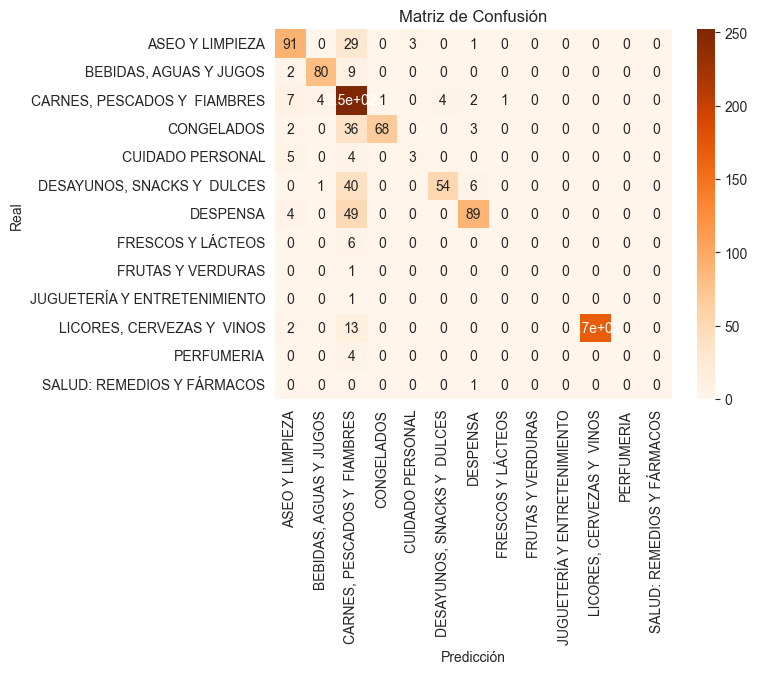

In [47]:
df_filter = df
categorical_columns = ['cluster300']
numerical_columns = []
objetivo = 'nombre_productos_clasificacion'
size = 0.25

X, y, random_list = df_to_train(df, objetivo, categorical_columns, numerical_columns, size)
clf = random_state_selection(X, y, random_list, size)
df = predict_with_model(df, objetivo, categorical_columns, numerical_columns, clf)

Filtrando el dataframe y eliminando los valores indefinidos y/o vacíos...
Listo!
Definiendo columnas de cálculo y columnas objetivo...
Listo!
Obteniendo random states donde aparezcan todas las categorías a predecir...
Existen  5  categorías
Listo!
-------------------------------------------
El tamaño del dataframe de entrenamiento será de : 302
El mejor train score se obtiene con el RS:  1865 , con un score de  0.8495575221238938
El mejor test score se obtiene con el RS:  459 , con un score de  0.7763157894736842
Accuracy Score on train data:  0.7743362831858407
Accuracy Score on test data:  0.7763157894736842
PAPEL Y CARTONES    26
PLÁSTICO            19
VIDRIOS             13
LATAS Y METALES     10
TETRAPACK            8
dtype: int64


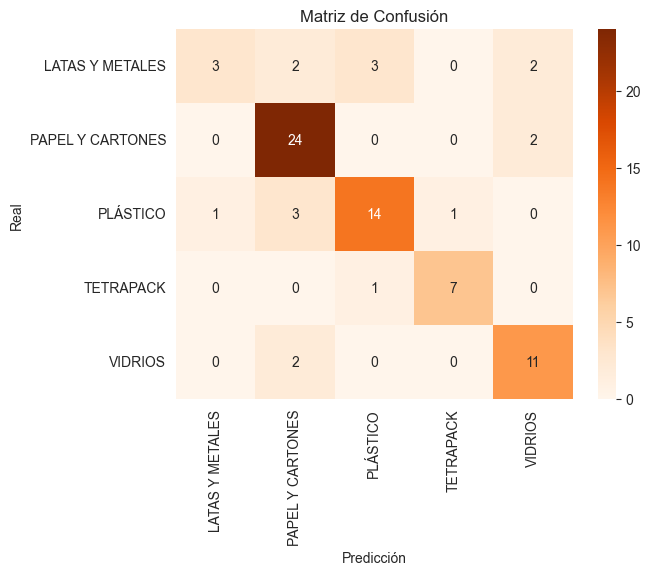

In [48]:
df_filter = df
categorical_columns = categorical_columns + [objetivo + '_pred' ]
numerical_columns = []
objetivo = 'categoria'
size = 0.25

X, y, random_list = df_to_train(df, objetivo, categorical_columns, numerical_columns, size)
clf = random_state_selection(X, y, random_list, size)
df = predict_with_model(df, objetivo, categorical_columns, numerical_columns, clf)

In [49]:
df

,id_producto,nombre_marca,nombre_reciclaje,nombre_empresa,nombre_productos_clasificacion,nombre,gramos_envase,formato,unidad,unidad_real,cantidad,texto,cluster300,label300,label,categoria,nombre_productos_clasificacion_pred,categoria_pred
0,44.0,celebrite,VIDRIO,CELEBRITE,"LICORES, CERVEZAS Y VINOS",Espumante Celebrite Extra Brut cc,800.0,NaN,NaN,NaN,NaN,espumante celebrite extra brut,114,Brut Espumante,Brut Espumante,VIDRIOS,"LICORES, CERVEZAS Y VINOS",VIDRIOS
1,55.0,viñamar,VIDRIO,CCU,"LICORES, CERVEZAS Y VINOS",Viña Mar Extra Brut,800.0,NaN,NaN,NaN,NaN,viña mar extra brut,43,NaN,Brut Viña,VIDRIOS,"LICORES, CERVEZAS Y VINOS",VIDRIOS
2,137.0,viñamar,VIDRIO,CCU,"LICORES, CERVEZAS Y VINOS",VINO ESPUMANTE EXTRA BRUT,800.0,750CC,CC,CC,750.0,vino espumante extra brut,114,Brut Espumante,Brut Espumante,VIDRIOS,"LICORES, CERVEZAS Y VINOS",VIDRIOS
3,4839.0,alto del carmen,VIDRIO,NaN,"LICORES, CERVEZAS Y VINOS",Pisco Alto del Carmen LT Alto Especial,800.0,NaN,NaN,NaN,NaN,pisco alto carmen alto especial,130,Pisco,Pisco,VIDRIOS,"LICORES, CERVEZAS Y VINOS",VIDRIOS
4,14.0,mistral,VIDRIO,CCU,"LICORES, CERVEZAS Y VINOS",PISCO ESPECIAL AÑEJADO EN ROBLE BOTELLA,800.0,750CC,CC,CC,750.0,pisco especial añejado roble botella,130,Pisco,Pisco,VIDRIOS,"LICORES, CERVEZAS Y VINOS",VIDRIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,872.0,prochef,NaN,PROCHEF,NaN,ACEITE AEROSOL COCO PROCHEF GR,1.0,225GR,GR,GR,225.0,aceite aerosol coco prochef,12,Aceite,Aceite,NaN,DESPENSA,VIDRIOS
4994,873.0,prochef,NaN,PROCHEF,NaN,ACEITE AEROSOL CANOL PROCHEF GR,1.0,400GR,GR,GR,400.0,aceite aerosol canol prochef,12,Aceite,Aceite,NaN,DESPENSA,VIDRIOS
4995,874.0,prochef,NaN,PROCHEF,NaN,SPRAY OLIVA LIGHT. PROCHEF GR,1.0,225GR,GR,GR,225.0,spray oliva light prochef,43,NaN,Spray,NaN,"CARNES, PESCADOS Y FIAMBRES",PAPEL Y CARTONES
4996,738.0,olivodeplata,NaN,OLIVODEPLATA,NaN,ACEITE OLIVA EXTRA VIRGEN OLIVODEPLATA LT,1.0,1LT,LT,LT,1.0,aceite oliva extra virgen olivodeplata,12,Aceite,Aceite,NaN,DESPENSA,VIDRIOS


Filtrando el dataframe y eliminando los valores indefinidos y/o vacíos...
Listo!
Definiendo columnas de cálculo y columnas objetivo...
Listo!
Obteniendo random states donde aparezcan todas las categorías a predecir...
Existen  13  categorías
Listo!
-------------------------------------------
El tamaño del dataframe de entrenamiento será de : 302
El mejor train score se obtiene con el RS:  687 , con un score de  0.9513274336283186
El mejor test score se obtiene con el RS:  1275 , con un score de  0.8947368421052632
Accuracy Score on train data:  0.911504424778761
Accuracy Score on test data:  0.8947368421052632
CARTÓN                    14
VIDRIO                    13
PAPEL                     11
PET 1                     11
ALUMINIO                   8
POLIETILENO Y ALUMINIO     7
PP 5                       3
HOJALATA                   2
OTROS 7                    2
PS 6                       2
HDPE 2                     1
LDPE 4                     1
PVC 3                      1
dtype

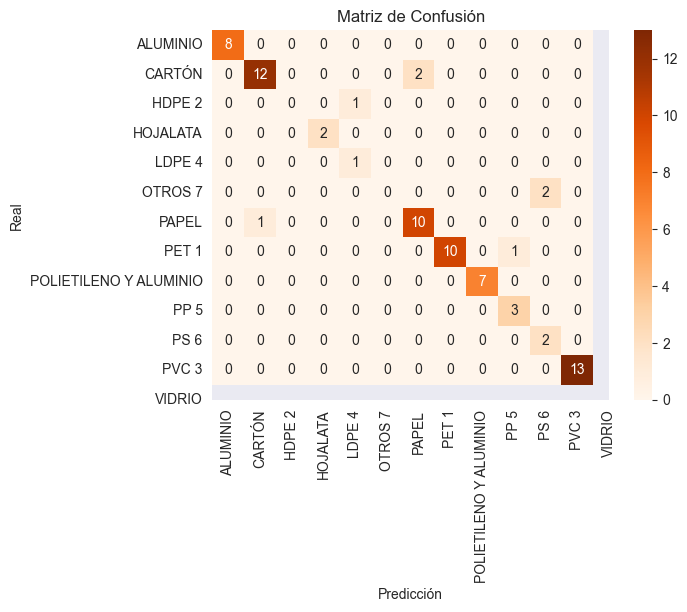

In [50]:
df_filter = df
categorical_columns = categorical_columns + [objetivo + '_pred' ]
numerical_columns = []
objetivo = 'nombre_reciclaje'
size = 0.25

X, y, random_list = df_to_train(df, objetivo, categorical_columns, numerical_columns, size)
clf = random_state_selection(X, y, random_list, size)
df = predict_with_model(df, objetivo, categorical_columns, numerical_columns, clf)

In [ ]:
df_filter = df
for element in df_filter.nombre_productos_clasificacion.unique():
    if len(df_filter[df_filter['nombre_productos_clasificacion']==element])<40:
        print(element)

In [ ]:
df_filter = df
categorical_columns = categorical_columns + [objetivo + '_pred' ]
numerical_columns = []
objetivo = 'nombre_productos_clasificacion'
size = 0.25

X, y, random_list = df_to_train(df, objetivo, categorical_columns, numerical_columns, size)
clf = random_state_selection(X, y, random_list, size)
df = predict_with_model(df, objetivo, categorical_columns, numerical_columns, clf)

Filtrando el dataframe y eliminando los valores indefinidos y/o vacíos...
Listo!
Definiendo columnas de cálculo y columnas objetivo...
Listo!
Obteniendo random states donde aparezcan todas las categorías a predecir...
Existen  6  categorías
Listo!
-------------------------------------------
El tamaño del dataframe de entrenamiento será de : 3575
El mejor train score se obtiene con el RS:  240 , con un score de  0.7776948899664304
El mejor test score se obtiene con el RS:  1303 , con un score de  0.7695749440715883
Accuracy Score on train data:  0.7545691906005222
Accuracy Score on test data:  0.7695749440715883
GR    457
LT    133
ML    120
UN     78
CC     77
KG     29
dtype: int64


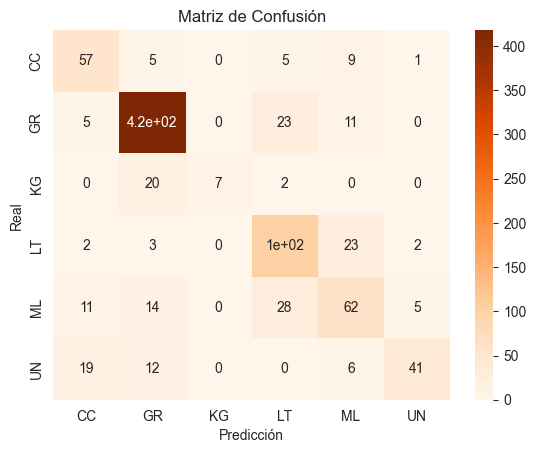

In [51]:
df_filter = df
categorical_columns = categorical_columns + [objetivo + '_pred' ]
numerical_columns = []
objetivo = 'unidad_real'
size = 0.25

X, y, random_list = df_to_train(df, objetivo, categorical_columns, numerical_columns, size)
clf = random_state_selection(X, y, random_list, size)
df = predict_with_model(df, objetivo, categorical_columns, numerical_columns, clf)

In [1]:
df

NameError: name 'df' is not defined

In [53]:
df.to_csv('BBDD_productos.csv', encoding = 'utf-8', index=False)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
#df_aux
size = 0.25
#regressor = RandomForestRegressor(n_estimators = 5000, criterion="mse")
min_list = []
for i in range(5000):
    #regressor = DecisionTreeRegressor(criterion='poisson', random_state=8811, max_leaf_nodes=25, max_features=215, max_depth=14, min_samples_leaf=1, min_samples_split=31)#, max_leaf_nodes=117, max_features=81, max_depth= 25, min_samples_split=50)
    regressor = DecisionTreeRegressor(criterion='absolute_error', random_state=6536, max_features=215+i, max_depth=200, max_leaf_nodes=146)
    #friedman_mse = 78.708
    #smean_squared_error = 78.708
    #poisson = 67.078
    #absolute_error = 59.242 i=244
    #df_aux = df[df['gramos_envase']>1]
    df_aux = df[df['cantidad']<1000]
    categorical_columns + [objetivo + '_pred' ]
    objetivo = 'gramos_envase'
    df_aux = df_aux[categorical_columns +[objetivo]]
    df_aux.dropna(inplace=True)
    X = pd.get_dummies(df_aux, columns = categorical_columns).drop(objetivo, axis=1)
    y = df_aux[objetivo]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size = size)
    regressor.fit(X_train, y_train)
    y_pred =  regressor.predict(X_test)
    rms = mean_squared_error(y_test, y_pred, squared=False)
    min_list.append(rms)
minimo = min(min_list)
lugar = min_list.index(minimo)
print('Se obtuvo un rms de ', minimo, ' con un valor de i de:', lugar)

In [56]:
df['cantidad'].dropna()

2       750.0
4       750.0
9       750.0
10      700.0
12        1.0
        ...  
4992      6.0
4993    225.0
4994    400.0
4995    225.0
4996      1.0
Name: cantidad, Length: 3595, dtype: float64

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedKFold
from tpot import TPOTRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

In [70]:
cols= ['label300','nombre_productos_clasificacion_pred','categoria_pred','nombre_reciclaje_pred','unidad_real_pred', 'cantidad']
df1 = df[cols]
# define evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search
model = TPOTRegressor(generations=5, population_size=50, scoring='neg_mean_absolute_error', cv=cv, verbosity=2, random_state=1, n_jobs=-1)
#X, y = df1[:, :-1], df1[:, -1]

In [71]:
df_filter = df
#categorical_columns = ['cluster_15', 'cluster_30', 'cluster_50', 'cluster_100', 'cluster_200', 'cluster_300']
#categorical_columns = ['cluster300']
#numerical_columns = []
objetivo = 'cantidad'
size = 0.25

X, y, random_list = df_to_train(df_filter, objetivo, categorical_columns, numerical_columns, size)

Filtrando el dataframe y eliminando los valores indefinidos y/o vacíos...
Listo!
Definiendo columnas de cálculo y columnas objetivo...
Listo!
Obteniendo random states donde aparezcan todas las categorías a predecir...
Existen  275  categorías
Listo!
-------------------------------------------
El tamaño del dataframe de entrenamiento será de : 3595


In [72]:
#define model
model = TPOTRegressor(generations=5, population_size=50, scoring='neg_mean_absolute_error', cv=cv, verbosity=2, random_state=1, n_jobs=-1)
# perform the search
model.fit(X, y)
# export the best model
model.export('tpot_insurance_best_model.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -47.82187787350317

Generation 2 - Current best internal CV score: -47.82187787350317

Generation 3 - Current best internal CV score: -47.72449871753307

Generation 4 - Current best internal CV score: -47.72449871753307

Generation 5 - Current best internal CV score: -47.72449871753307

Best pipeline: SGDRegressor(input_matrix, alpha=0.0, eta0=1.0, fit_intercept=False, l1_ratio=0.0, learning_rate=constant, loss=huber, penalty=elasticnet, power_t=0.5)


In [ ]:
df_aux = df[['cluster300','categoria_pred', 'nombre_reciclaje_pred','nombre_productos_clasificacion_pred', 'unidad_real_pred', 'cantidad']].dropna()
df_aux

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df_aux['cantidad']

In [ ]:
df_aux = df_aux[df_aux['cantidad'] < 1000]
objetivo = 'cantidad'
categorical_columns = ['categoria_pred', 'nombre_reciclaje_pred','nombre_productos_clasificacion_pred', 'unidad_real_pred']
X = pd.get_dummies(df_aux, columns = categorical_columns).drop(objetivo, axis=1)
y = df_aux[objetivo]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

# Building and training our model
clf = svm.SVR(kernel='rbf')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(mean_squared_error(y_test, predictions))

In [ ]:
df[df['gramos_envase']>1]['cantidad']

In [ ]:
sns.histplot(df, x='cantidad')

In [ ]:
df[(df['unidad'] != 'GR') & (df['cantidad']>1000)]